# Dirichlet Process Mixture Models: basics

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import theano
import theano.tensor as tt
import pymc3 as pm
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('notebook')
np.random.seed(12345)
rc = {'xtick.labelsize': 20, 'ytick.labelsize': 20, 'axes.labelsize': 20, 'font.size': 20, 
      'legend.fontsize': 12.0, 'axes.titlesize': 10, "figure.figsize": [14, 6]}
sns.set(rc = rc)
sns.set_style("whitegrid")

## The stick-breaking construction

Use the strick-breaking construction to sample from a Dirichlet process.

In [4]:
from __future__ import division
import scipy as sp
from statsmodels.datasets import get_rdataset

Prespecify parameters of a DP as follows.

In [158]:
N = 3 # number of mixtures
K = 30 # number of components
alpha = 0.2 # concentration parameter
G_0 = sp.stats.norm # the base distribution of a DP
f = lambda y, mean: sp.stats.norm.pdf(y, loc = mean, scale = 0.3) # Probability density function evaluated at y

Draw samples from a strick-breaking process

In [159]:
v = sp.stats.beta.rvs(b = 1, a = alpha, size = (N, K)) # proportions of a stick being broken off
pi = np.empty_like(v) # proportions/weights of the stick

In [160]:
pi[:, 0] = v[:, 0] # v1 = pi_1, first proportion of the stick
pi[:, 1:] = v[:, 1:] * (1 - v[:, :-1]).cumprod(axis = 1) # remaining proportions of the stick left

In [161]:
mean = G_0.rvs(size = (N, K)) # sample means/centers from the base distribution

In [162]:
y_plot = np.linspace(-3, 3, 200)

In [163]:
y_plot[np.newaxis, np.newaxis, :]

array([[[-3.        , -2.96984925, -2.93969849, -2.90954774, -2.87939698,
         -2.84924623, -2.81909548, -2.78894472, -2.75879397, -2.72864322,
         -2.69849246, -2.66834171, -2.63819095, -2.6080402 , -2.57788945,
         -2.54773869, -2.51758794, -2.48743719, -2.45728643, -2.42713568,
         -2.39698492, -2.36683417, -2.33668342, -2.30653266, -2.27638191,
         -2.24623116, -2.2160804 , -2.18592965, -2.15577889, -2.12562814,
         -2.09547739, -2.06532663, -2.03517588, -2.00502513, -1.97487437,
         -1.94472362, -1.91457286, -1.88442211, -1.85427136, -1.8241206 ,
         -1.79396985, -1.7638191 , -1.73366834, -1.70351759, -1.67336683,
         -1.64321608, -1.61306533, -1.58291457, -1.55276382, -1.52261307,
         -1.49246231, -1.46231156, -1.4321608 , -1.40201005, -1.3718593 ,
         -1.34170854, -1.31155779, -1.28140704, -1.25125628, -1.22110553,
         -1.19095477, -1.16080402, -1.13065327, -1.10050251, -1.07035176,
         -1.04020101, -1.01005025, -0.

In [164]:
mean[..., np.newaxis]

array([[[-0.52659823],
        [ 0.23427992],
        [ 0.46885372],
        [ 0.97157092],
        [ 0.18491514],
        [ 1.15875833],
        [-0.31943969],
        [-0.10397529],
        [ 0.3667097 ],
        [-0.57049679],
        [ 1.23047578],
        [ 1.25030642],
        [-1.15888168],
        [ 1.00063768],
        [-0.26964235],
        [-1.39334589],
        [-0.16933968],
        [-1.39505838],
        [ 0.32435389],
        [-0.52794764],
        [ 0.3101501 ],
        [ 0.82494857],
        [-1.14774918],
        [ 1.00078174],
        [-1.26127751],
        [ 0.67575019],
        [ 1.34434725],
        [-1.43365721],
        [-0.20058615],
        [-1.13044597]],

       [[ 0.06811508],
        [-0.22283434],
        [-0.61171591],
        [-0.28291657],
        [-0.60469348],
        [ 0.62483689],
        [ 1.3914349 ],
        [ 1.61112076],
        [-1.20257787],
        [-0.12106254],
        [ 1.52700267],
        [ 1.85861484],
        [-0.88895319],
        [

In [165]:
# Probability density function evaluated at each component position y
dpm_pdf_components = f(y = y_plot[np.newaxis, np.newaxis, :], mean = mean[..., np.newaxis])
dpm_pdf_components

array([[[  2.30826896e-15,   5.25961486e-15,   1.18640994e-14, ...,
           1.36181546e-29,   4.24233994e-30,   1.30829586e-30],
        [  7.67514984e-26,   2.25660892e-25,   6.56808908e-25, ...,
           2.91201604e-18,   1.17053087e-18,   4.65784763e-19],
        [  1.23404975e-29,   3.92491978e-29,   1.23578295e-28, ...,
           2.47622074e-15,   1.07673082e-15,   4.63487717e-16],
        ..., 
        [  1.60060165e-06,   2.69141524e-06,   4.48013861e-06, ...,
           9.48436177e-47,   2.18034506e-47,   4.96198727e-48],
        [  1.64350206e-19,   4.17705341e-19,   1.05095254e-18, ...,
           2.14167798e-24,   7.44172504e-25,   2.55980195e-25],
        [  4.90543143e-09,   9.13039472e-09,   1.68234552e-08, ...,
           1.42572825e-40,   3.62801247e-41,   9.13932423e-42]],

       [[  2.58109278e-23,   7.17789910e-23,   1.97607935e-22, ...,
           1.69159750e-20,   6.43147286e-21,   2.42067868e-21],
        [  3.27428803e-19,   8.25999373e-19,   2.06279397e-1

In [166]:
dpm_pdfs = (pi[..., np.newaxis] * dpm_pdf_components).sum(axis=1)
dpm_pdfs

array([[  1.31250535e-08,   2.20828348e-08,   3.67828445e-08,
          6.06561389e-08,   9.90251711e-08,   1.60051772e-07,
          2.56107519e-07,   4.05727373e-07,   6.36355661e-07,
          9.88150165e-07,   1.51917423e-06,   2.31237560e-06,
          3.48481967e-06,   5.19970636e-06,   7.68174430e-06,
          1.12364696e-05,   1.62740631e-05,   2.33381219e-05,
          3.31396577e-05,   4.65963066e-05,   6.48763336e-05,
          8.94464837e-05,   1.22122082e-04,   1.65117032e-04,
          2.21090553e-04,   2.93186656e-04,   3.85061625e-04,
          5.00894183e-04,   6.45372702e-04,   8.23653919e-04,
          1.04128819e-03,   1.30410750e-03,   1.61807408e-03,
          1.98909025e-03,   2.42277245e-03,   2.92419652e-03,
          3.49762432e-03,   4.14622572e-03,   4.87181334e-03,
          5.67461000e-03,   6.55307112e-03,   7.50378500e-03,
          8.52147365e-03,   9.59911520e-03,   1.07282058e-02,
          1.18991743e-02,   1.31019579e-02,   1.43267383e-02,
        

Visualize the components

In [167]:
fig, ax = plt.subplots()
ax.plot(y_plot, dpm_pdfs.T)
ax.set_xlabel('Component indexes')
ax.set_ylabel('Probabiliity densities of components')
fig = plt.gcf()
import plotly as py
py.offline.init_notebook_mode(connected=True)
py.offline.iplot_mpl(fig)
#plt.savefig('figpath1.svg', dpi = 400, bbox_inches = "tight")

Focus on a single mixture and decompose it into its individual mixture components

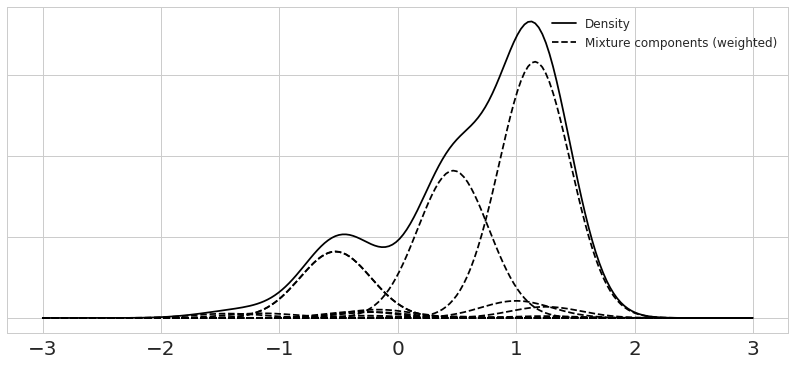

In [168]:
fig, ax = plt.subplots()
ix = 0

ax.plot(y_plot, dpm_pdfs[ix], c='k', label='Density');
ax.plot(y_plot, (pi[..., np.newaxis] * dpm_pdf_components)[ix, 0],
        '--', c='k', label='Mixture components (weighted)');
ax.plot(y_plot, (pi[..., np.newaxis] * dpm_pdf_components)[ix].T,
        '--', c='k');

ax.set_yticklabels([]);
ax.legend(loc=1);

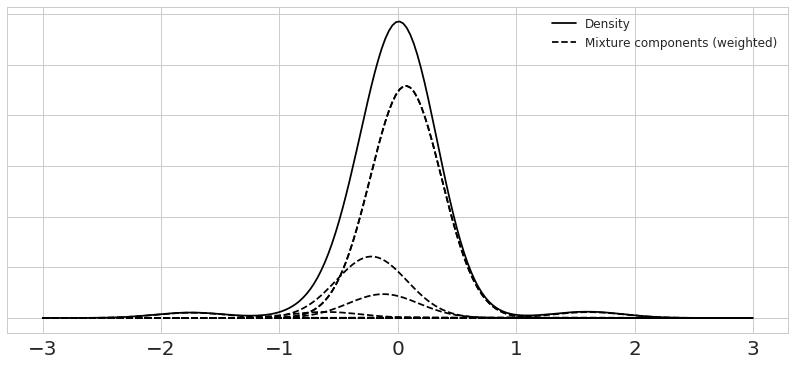

In [169]:
fig, ax = plt.subplots()
ix = 1

ax.plot(y_plot, dpm_pdfs[ix], c='k', label='Density');
ax.plot(y_plot, (pi[..., np.newaxis] * dpm_pdf_components)[ix, 0],
        '--', c='k', label='Mixture components (weighted)');
ax.plot(y_plot, (pi[..., np.newaxis] * dpm_pdf_components)[ix].T,
        '--', c='k');

ax.set_yticklabels([]);
ax.legend(loc=1);

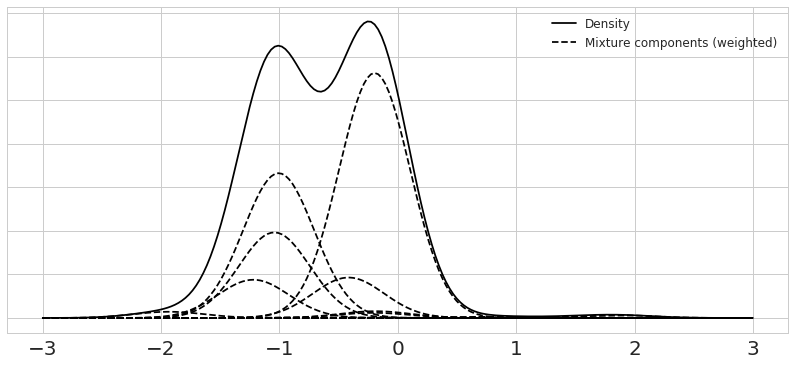

In [170]:
fig, ax = plt.subplots()
ix = 2

ax.plot(y_plot, dpm_pdfs[ix], c='k', label='Density');
ax.plot(y_plot, (pi[..., np.newaxis] * dpm_pdf_components)[ix, 0],
        '--', c='k', label='Mixture components (weighted)');
ax.plot(y_plot, (pi[..., np.newaxis] * dpm_pdf_components)[ix].T,
        '--', c='k');

ax.set_yticklabels([]);
ax.legend(loc=1);